In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pandas.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv', usecols = [i for i in range(21)])
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [5]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
dataset.dropna()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Controlling typicalness

In [7]:
dataset['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [8]:
dataset['Gender'].unique()

array(['M', 'F'], dtype=object)

In [9]:
dataset['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [10]:
dataset['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [11]:
dataset['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [12]:
dataset['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

# One-Hot Encoding

In [13]:
onehotencoder = OneHotEncoder()

In [14]:
dataset['Education_Level'] = pd.Categorical(dataset['Education_Level'])
datasetDummies_Education_Level = pd.get_dummies(dataset['Education_Level'], prefix = 'Education_Level_encoded')
datasetDummies_Education_Level

,Education_Level_encoded_College,Education_Level_encoded_Doctorate,Education_Level_encoded_Graduate,Education_Level_encoded_High School,Education_Level_encoded_Post-Graduate,Education_Level_encoded_Uneducated,Education_Level_encoded_Unknown
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
10122,0,0,1,0,0,0,0
10123,0,0,0,0,0,0,1
10124,0,0,0,1,0,0,0
10125,0,0,1,0,0,0,0


In [15]:
dataset['Marital_Status'] = pd.Categorical(dataset['Marital_Status'])
datasetDummies_Marital_Status = pd.get_dummies(dataset['Marital_Status'], prefix = 'Marital_Status_encoded')
datasetDummies_Marital_Status

,Marital_Status_encoded_Divorced,Marital_Status_encoded_Married,Marital_Status_encoded_Single,Marital_Status_encoded_Unknown
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
10122,0,0,1,0
10123,1,0,0,0
10124,0,1,0,0
10125,0,0,0,1


In [16]:
dataset['Income_Category'] = pd.Categorical(dataset['Income_Category'])
datasetDummies_Income_Category = pd.get_dummies(dataset['Income_Category'], prefix = 'Income_Category_encoded')
datasetDummies_Income_Category

,Income_Category_encoded_$120K +,Income_Category_encoded_$40K - $60K,Income_Category_encoded_$60K - $80K,Income_Category_encoded_$80K - $120K,Income_Category_encoded_Less than $40K,Income_Category_encoded_Unknown
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
10122,0,1,0,0,0,0
10123,0,1,0,0,0,0
10124,0,0,0,0,1,0
10125,0,1,0,0,0,0


In [17]:
dataset['Card_Category'] = pd.Categorical(dataset['Card_Category'])
datasetDummies_Card_Category = pd.get_dummies(dataset['Card_Category'], prefix = 'Card_Category_encoded')
datasetDummies_Card_Category

,Card_Category_encoded_Blue,Card_Category_encoded_Gold,Card_Category_encoded_Platinum,Card_Category_encoded_Silver
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10122,1,0,0,0
10123,1,0,0,0
10124,1,0,0,0
10125,1,0,0,0


In [18]:
dataset.drop("Education_Level", axis=1, inplace=True)
dataset.drop("Marital_Status", axis=1, inplace=True)
dataset.drop("Income_Category", axis=1, inplace=True)
dataset.drop("Card_Category", axis=1, inplace=True)
dataset.drop("CLIENTNUM", axis=1, inplace=True)

In [19]:
dataset = pd.concat([dataset, datasetDummies_Education_Level], axis=1)
dataset = pd.concat([dataset, datasetDummies_Marital_Status], axis=1)
dataset = pd.concat([dataset, datasetDummies_Income_Category], axis=1)
dataset = pd.concat([dataset, datasetDummies_Card_Category], axis=1)
dataset

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_encoded_$120K +,Income_Category_encoded_$40K - $60K,Income_Category_encoded_$60K - $80K,Income_Category_encoded_$80K - $120K,Income_Category_encoded_Less than $40K,Income_Category_encoded_Unknown,Card_Category_encoded_Blue,Card_Category_encoded_Gold,Card_Category_encoded_Platinum,Card_Category_encoded_Silver
0,Existing Customer,45,M,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,Existing Customer,49,F,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,Existing Customer,51,M,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,Existing Customer,40,F,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,Existing Customer,40,M,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,40,3,2,3,4003.0,1851,...,0,1,0,0,0,0,1,0,0,0
10123,Attrited Customer,41,M,2,25,4,2,3,4277.0,2186,...,0,1,0,0,0,0,1,0,0,0
10124,Attrited Customer,44,F,1,36,5,3,4,5409.0,0,...,0,0,0,0,1,0,1,0,0,0
10125,Attrited Customer,30,M,2,36,4,3,3,5281.0,0,...,0,1,0,0,0,0,1,0,0,0


# Label Encoding

In [20]:
af_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
dataset['Attrition_Flag'] = dataset['Attrition_Flag'].map(af_mapping)

In [21]:
gender_mapping = {'M': 0, 'F': 1}
dataset['Gender'] = dataset['Gender'].map(gender_mapping)

In [22]:
dataset.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_encoded_$120K +,Income_Category_encoded_$40K - $60K,Income_Category_encoded_$60K - $80K,Income_Category_encoded_$80K - $120K,Income_Category_encoded_Less than $40K,Income_Category_encoded_Unknown,Card_Category_encoded_Blue,Card_Category_encoded_Gold,Card_Category_encoded_Platinum,Card_Category_encoded_Silver
9488,0,37,1,2,28,1,3,1,3525.0,1519,...,0,0,0,0,1,0,1,0,0,0
8332,1,39,1,3,26,5,2,5,2190.0,0,...,0,0,0,0,1,0,1,0,0,0
7625,0,35,1,2,36,4,3,1,1476.0,0,...,0,0,0,0,1,0,1,0,0,0
7853,0,45,1,3,26,1,1,2,2032.0,1195,...,0,1,0,0,0,0,1,0,0,0
5607,0,58,1,2,50,3,2,3,12362.0,0,...,0,0,0,0,0,1,1,0,0,0
5609,0,47,1,4,37,4,3,3,3189.0,1863,...,0,0,0,0,1,0,1,0,0,0
5001,0,32,1,2,24,5,3,1,1553.0,1177,...,0,1,0,0,0,0,1,0,0,0
5146,0,54,1,2,41,5,2,4,1438.3,814,...,0,0,0,0,1,0,1,0,0,0
2663,0,45,0,2,41,5,2,2,8532.0,2165,...,0,1,0,0,0,0,1,0,0,0
2599,0,33,1,3,36,5,3,3,4838.0,1338,...,0,0,0,0,1,0,1,0,0,0


# Correlation Graphics

In [23]:
list(dataset.columns)

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Education_Level_encoded_College',
 'Education_Level_encoded_Doctorate',
 'Education_Level_encoded_Graduate',
 'Education_Level_encoded_High School',
 'Education_Level_encoded_Post-Graduate',
 'Education_Level_encoded_Uneducated',
 'Education_Level_encoded_Unknown',
 'Marital_Status_encoded_Divorced',
 'Marital_Status_encoded_Married',
 'Marital_Status_encoded_Single',
 'Marital_Status_encoded_Unknown',
 'Income_Category_encoded_$120K +',
 'Income_Category_encoded_$40K - $60K',
 'Income_Category_encoded_$60K - $80K',
 'Income_Category_encoded_$80K - $120K',
 'Income_Category_encoded_Less than $40K',
 'Income_Category_encoded_Unknown',
 'Card_Catego

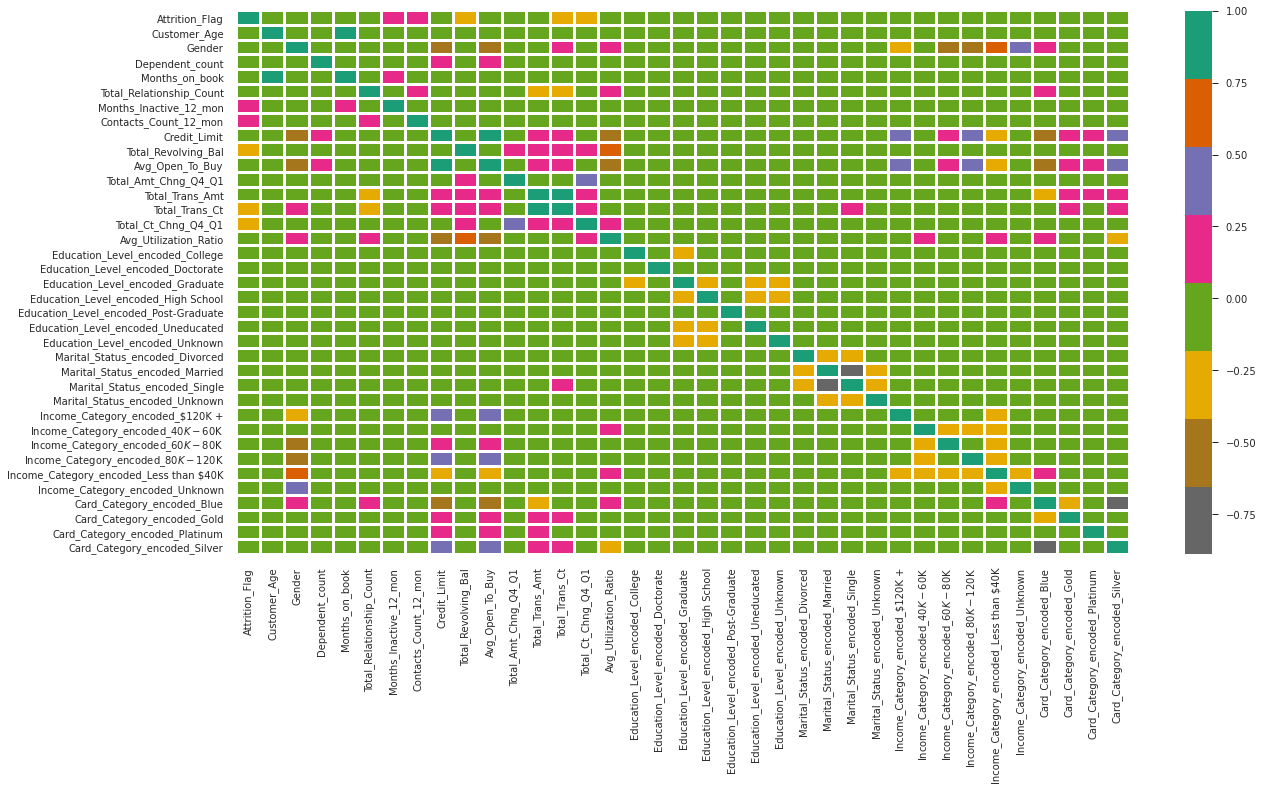

In [24]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dataset.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

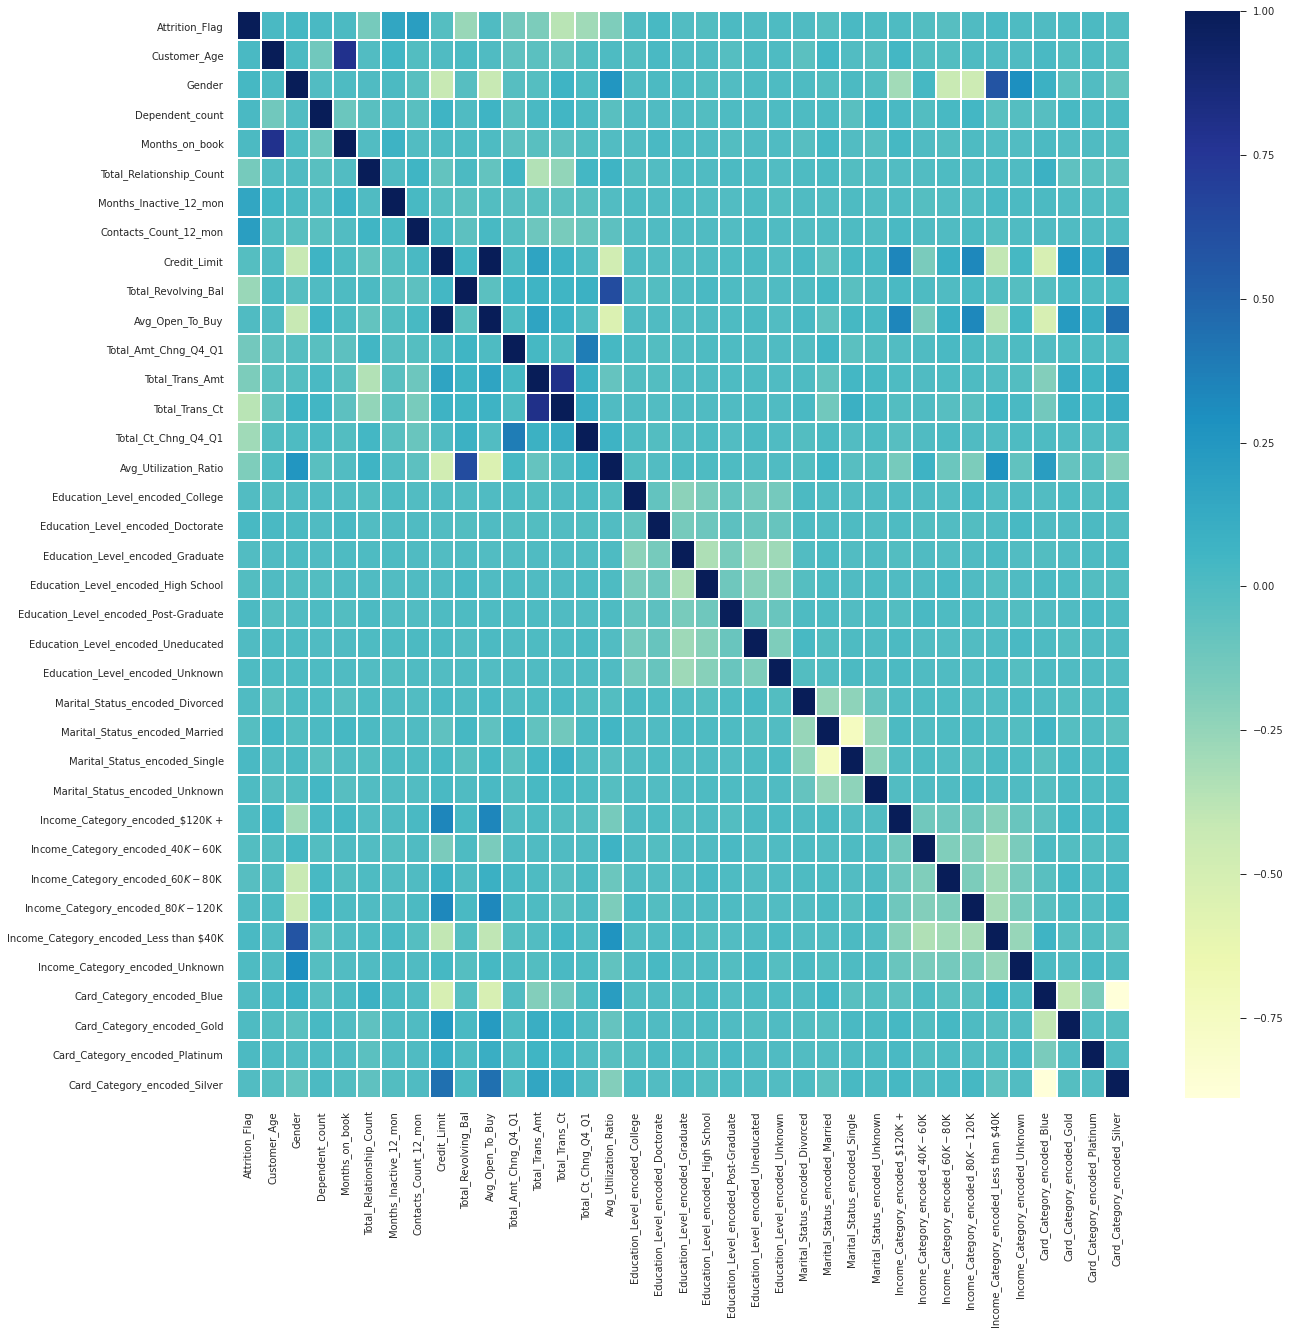

In [25]:
plt.subplots(figsize=(20,20))
corr=dataset.corr(method='pearson')
#using heatmap to plot correlation
sns.set_style('darkgrid')
sns.heatmap(corr,cmap="YlGnBu",annot=False, linewidths=1)

# Data Visualization

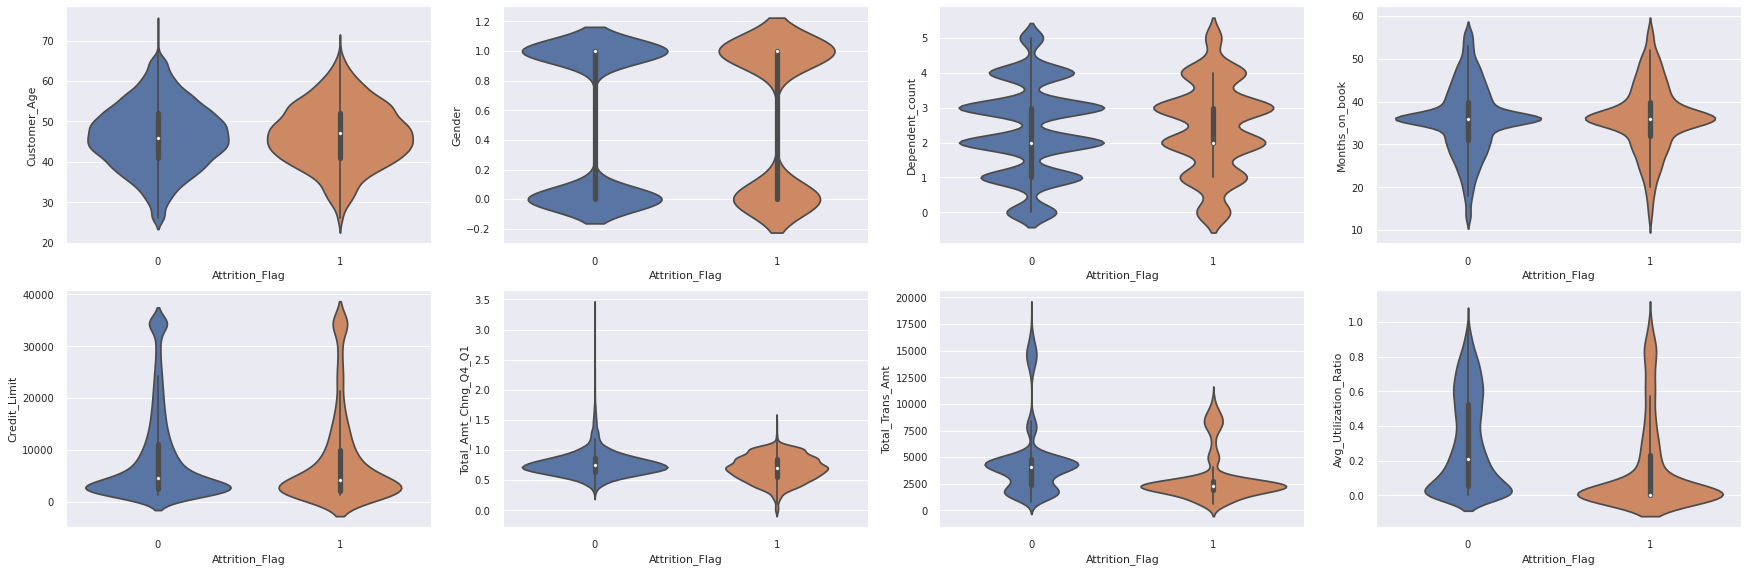

In [26]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.violinplot(x = 'Attrition_Flag', y = 'Customer_Age', data = dataset)

plt.subplot(4,4,2)
sns.violinplot(x = 'Attrition_Flag', y = 'Gender', data = dataset)

plt.subplot(4,4,3)
sns.violinplot(x = 'Attrition_Flag', y = 'Dependent_count', data = dataset)

plt.subplot(4,4,4)
sns.violinplot(x = 'Attrition_Flag', y = 'Months_on_book', data = dataset)

plt.subplot(4,4,5)
sns.violinplot(x = 'Attrition_Flag', y = 'Credit_Limit', data = dataset)

plt.subplot(4,4,6)
sns.violinplot(x = 'Attrition_Flag', y = 'Total_Amt_Chng_Q4_Q1', data = dataset)

plt.subplot(4,4,7)
sns.violinplot(x = 'Attrition_Flag', y = 'Total_Trans_Amt', data = dataset)

plt.subplot(4,4,8)
sns.violinplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio', data = dataset)

Text(0.5, 1.0, 'Avg_Open_To_Buy Interval')

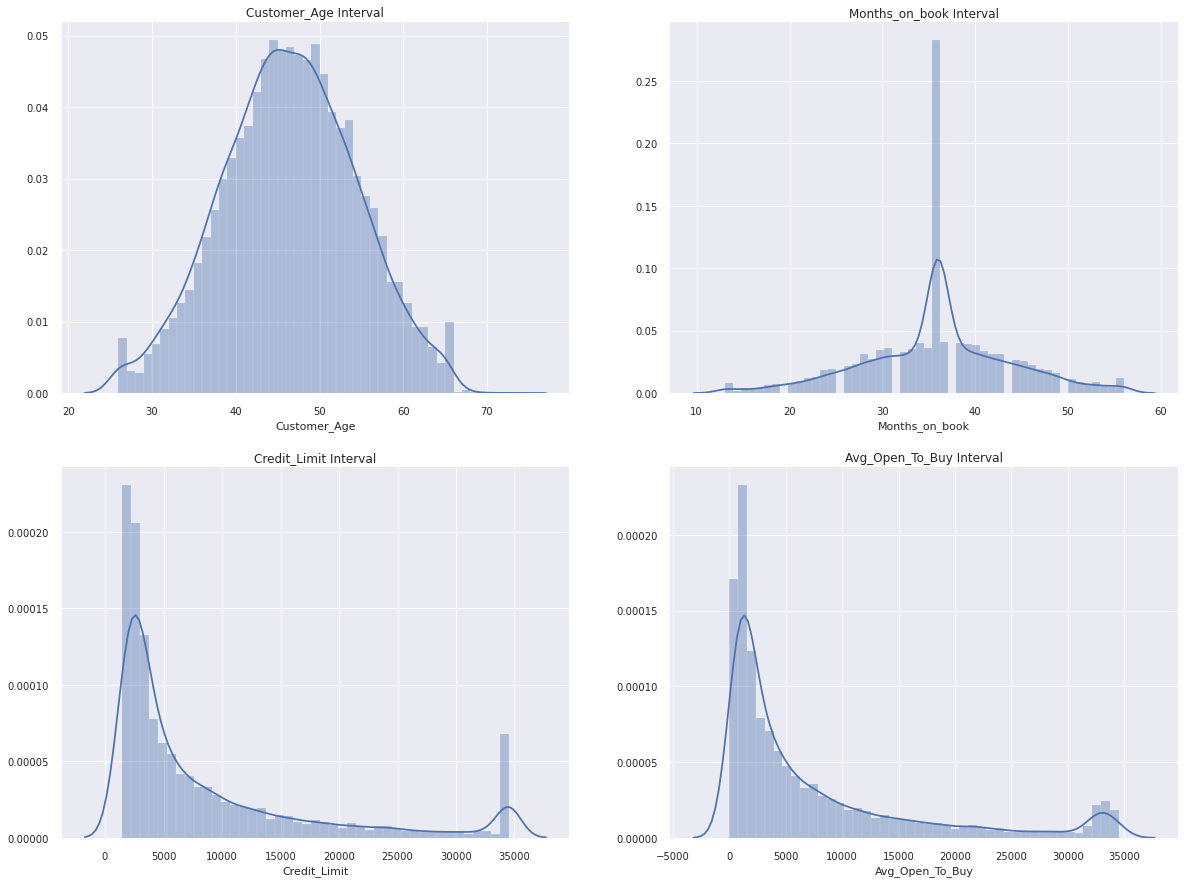

In [27]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.distplot(dataset['Customer_Age']).set_title('Customer_Age Interval')

plt.subplot(2,2,2)
sns.distplot(dataset['Months_on_book']).set_title('Months_on_book Interval')

plt.subplot(2,2,3)
sns.distplot(dataset['Credit_Limit']).set_title('Credit_Limit Interval')

plt.subplot(2,2,4)
sns.distplot(dataset['Avg_Open_To_Buy']).set_title('Avg_Open_To_Buy Interval')

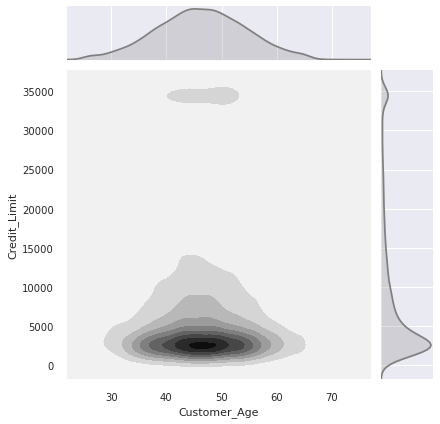

In [28]:
sns.jointplot(x='Customer_Age',y='Credit_Limit',data=dataset,color='grey',kind='kde');

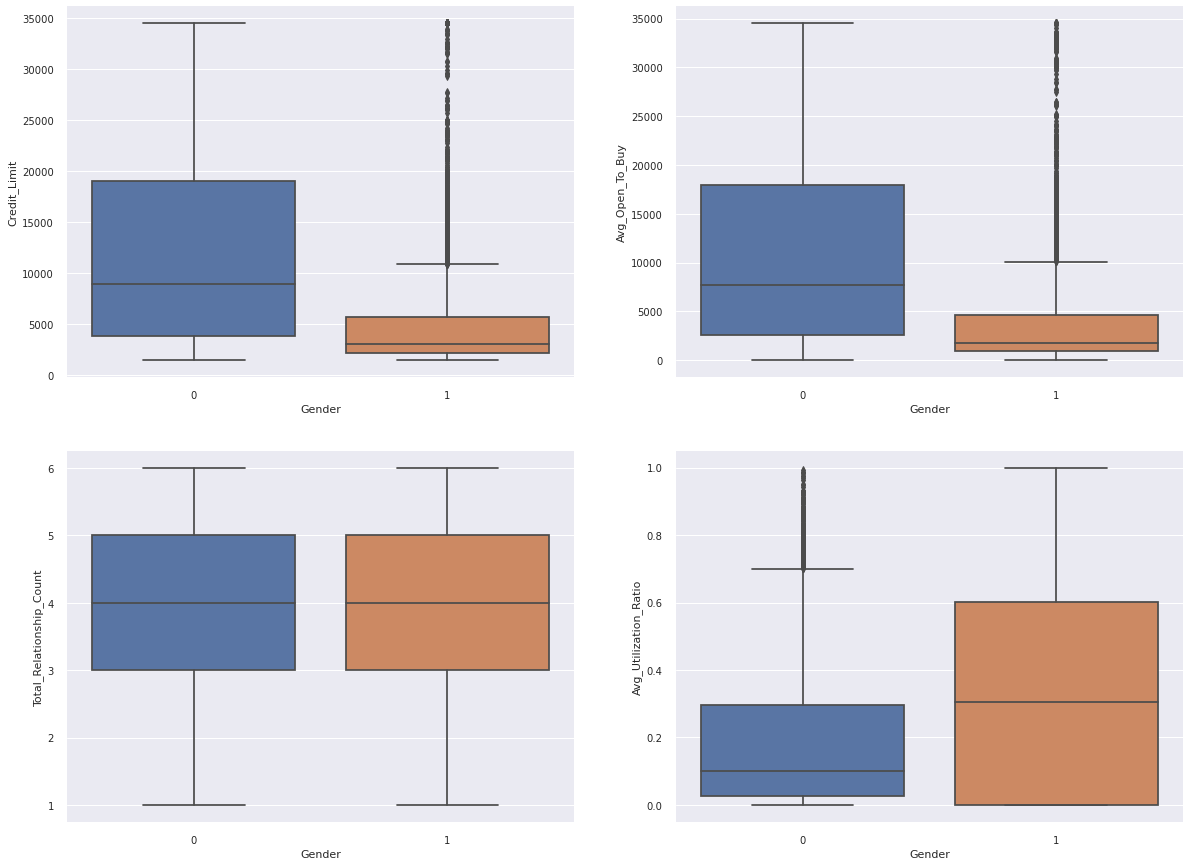

In [29]:
plt.figure(figsize=(20,15))
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.boxplot(x='Gender', y='Credit_Limit',data=dataset);

plt.subplot(2,2,2)
sns.boxplot(x='Gender', y='Avg_Open_To_Buy',data=dataset);

plt.subplot(2,2,3)
sns.boxplot(x='Gender', y='Total_Relationship_Count',data=dataset);

plt.subplot(2,2,4)
sns.boxplot(x='Gender', y='Avg_Utilization_Ratio',data=dataset);

# Data Preprocessing

In [30]:
features = [
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Education_Level_encoded_College',
 'Education_Level_encoded_Doctorate',
 'Education_Level_encoded_Graduate',
 'Education_Level_encoded_High School',
 'Education_Level_encoded_Post-Graduate',
 'Education_Level_encoded_Uneducated',
 'Education_Level_encoded_Unknown',
 'Marital_Status_encoded_Divorced',
 'Marital_Status_encoded_Married',
 'Marital_Status_encoded_Single',
 'Marital_Status_encoded_Unknown',
 'Income_Category_encoded_$120K +',
 'Income_Category_encoded_$40K - $60K',
 'Income_Category_encoded_$60K - $80K',
 'Income_Category_encoded_$80K - $120K',
 'Income_Category_encoded_Less than $40K',
 'Income_Category_encoded_Unknown',
 'Card_Category_encoded_Blue',
 'Card_Category_encoded_Gold',
 'Card_Category_encoded_Platinum',
 'Card_Category_encoded_Silver']

label = ['Attrition_Flag']

X = dataset[features]
y = dataset[label]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10127
Total # of sample in train dataset: 6785
Total # of sample in validation dataset: 1671
Total # of sample in test dataset: 1671


In [32]:
X = normalize(X, norm = 'l2')

# Scores of Models

In [33]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  print("############################################################################")
  print("")
  print("")
  print("")

GaussianNB
Train score of trained model: 89.62417096536478
Validation score of trained model: 88.56971873129862
Test score of trained model: 89.5870736086176
 
Confussion Matrix: 
[[1329  104]
 [  70  168]]

Accuracy : 0.895870736086176
Precision: 0.6176470588235294
Recall   : 0.7058823529411765
F1 score : 0.6588235294117647
Specificity : 0.9274249825540823

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1433
           1       0.62      0.71      0.66       238

    accuracy                           0.90      1671
   macro avg       0.78      0.82      0.80      1671
weighted avg       0.90      0.90      0.90      1671



############################################################################



MultinomialNB
Train score of trained model: 67.03021370670596
Validation score of trained model: 63.37522441651705
Test score of trained model: 63.67444643925793
 
Confussion Matrix: 
[[958 166]
 [441 106]]

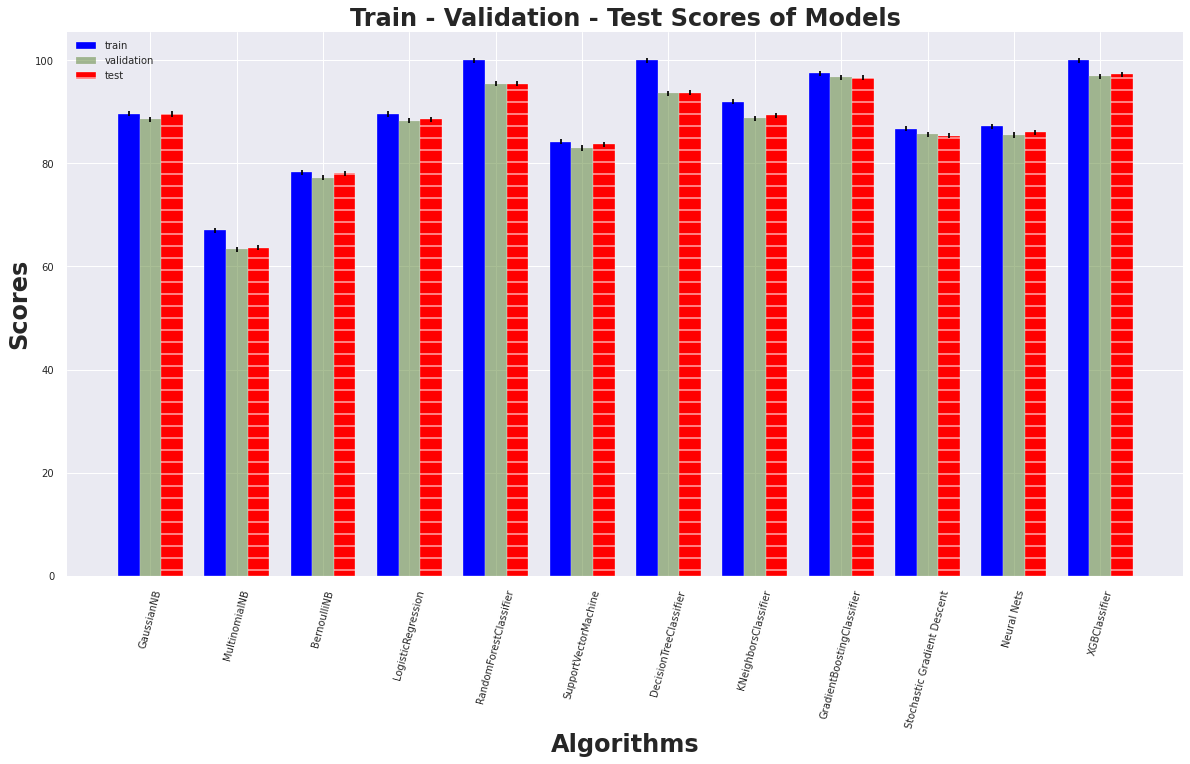

In [34]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [35]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 89.5870736086176
Accuracy of MultinomialNB -----> 63.67444643925793
Accuracy of BernoulliNB -----> 78.09694793536805
Accuracy of LogisticRegression -----> 88.56971873129862
Accuracy of RandomForestClassifier -----> 95.45182525433871
Accuracy of SupportVectorMachine -----> 83.72232196289647
Accuracy of DecisionTreeClassifier -----> 93.71633752244165
Accuracy of KNeighborsClassifier -----> 89.3476959904249
Accuracy of GradientBoostingClassifier -----> 96.64871334530221
Accuracy of Stochastic Gradient Descent -----> 85.39796529024535
Accuracy of Neural Nets -----> 86.05625374027528
Accuracy of XGBClassifier -----> 97.30700179533214


# Best Features Selection

In [36]:
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'XGBClassifier': XGBClassifier()
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

MultinomialNB
Old Shape: (10127, 36) New shape: (10127, 29)


BernoulliNB
Old Shape: (10127, 36) New shape: (10127, 16)


LogisticRegression
Old Shape: (10127, 36) New shape: (10127, 6)


RandomForestClassifier
Old Shape: (10127, 36) New shape: (10127, 16)


DecisionTreeClassifier
Old Shape: (10127, 36) New shape: (10127, 13)


GradientBoostingClassifier
Old Shape: (10127, 36) New shape: (10127, 11)


Stochastic Gradient Descent
Old Shape: (10127, 36) New shape: (10127, 6)


XGBClassifier
Old Shape: (10127, 36) New shape: (10127, 12)


